In [1]:
using Gadfly, Interact

#  Colors used for plotting, based on Color Brewer 3class Set 1
blue = colorant"#377eb8"; 

# Frequency range
ω=logspace(-2,6,100);
j=im;

# Default style for plotting
set_default_plot_size(20cm, 15cm);
properties=(Geom.line, Scale.x_log10, Guide.XLabel("Frequency (rad/s)"), Theme(line_width=2pt, default_color=blue), Guide.xticks(ticks=collect(-2:5)));
propertiesMagnitude=(properties..., Guide.YLabel("|H(jω)| (dB)", orientation=:vertical),      Coord.Cartesian(ymin=-40, ymax=20));
propertiesPhase    =(properties..., Guide.YLabel("Phase H(jω) (rad)", orientation=:vertical), Coord.Cartesian(ymin=-pi, ymax=pi), Guide.yticks(ticks=[-pi,-pi/2,0,pi/2,pi]), Scale.y_continuous(labels=y->@sprintf("%0.2f",y)));

  likely near /home/adityam/.julia/v0.4/Interact/src/IJulia/setup.jl:153
  likely near /home/adityam/.julia/v0.4/Interact/src/IJulia/setup.jl:157


In [2]:
function BodePlot(H)
    magnitude = 20log10(abs(H))
    phase     = angle(H)
    
    
    magnitudePlot = plot(x=ω, y=magnitude,propertiesMagnitude...)
    phasePlot     = plot(x=ω, y=phase,  propertiesPhase...)
    
    vstack(magnitudePlot, phasePlot)
    
end

 in depwarn at ./deprecated.jl:73
while loading /home/adityam/.julia/v0.4/Interact/src/IJulia/statedict.jl, in expression starting on line 1


BodePlot (generic function with 1 method)

### Poles

Consider a transfer function 

$$
        H(j\omega) = \frac{1}{\displaystyle 1 + j\left(\frac{ \omega }{a}\right)}
$$
which has a pole at $-a$

Interact.Options{:ToggleButtons,Int64}([Reactive.Input{Int64}] 10,"a",10,"10",Interact.OptionDict(Any["10","100","1000","10000","100000"],Dict{Any,Any}("1000"=>1000,"100000"=>100000,"10"=>10,"10000"=>10000,"100"=>100)),Any[],Any[])

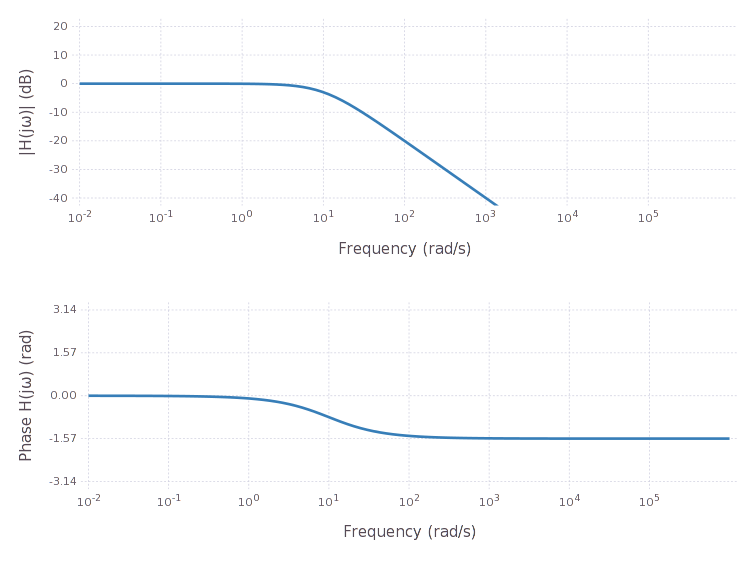

In [3]:
@manipulate for a in round(Int64,logspace(1,5,5))
    H = 1 ./ (1 + j*ω./a);
    BodePlot(H)
    
end

### Zeros

Consider a transfer function 

$$
        H(j\omega) = \displaystyle 1 + j\left(\frac{ \omega }{a}\right)
$$
which has a zero at $-a$

Interact.Options{:ToggleButtons,Int64}([Reactive.Input{Int64}] 10,"a",10,"10",Interact.OptionDict(Any["10","100","1000","10000","100000"],Dict{Any,Any}("1000"=>1000,"100000"=>100000,"10"=>10,"10000"=>10000,"100"=>100)),Any[],Any[])

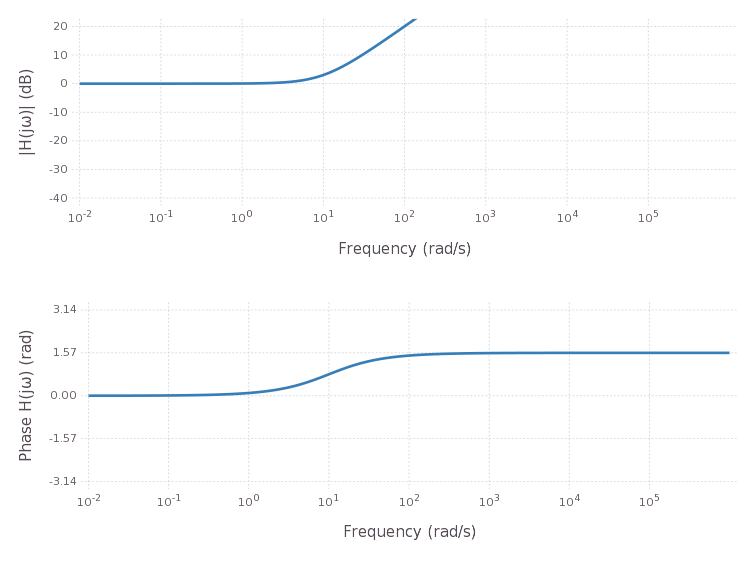

In [4]:
@manipulate for a in round(Int64,logspace(1,5,5))
    H = (1 + j*ω./a);
    BodePlot(H)
    
end

### Complex conjugate poles
$$
\frac {\omega^2} {s^2 + 2\zeta\omega s + \omega^2}
$$

In [ ]:
@manipulate for ω₀ in round(Int64,logspace(1,3,3)) , ζ in slider(0.1:0.1:0.5, value=0.2, label="ζ" )
H(s)=ω₀^2/(s^2 + 2*ζ*ω₀*s +ω₀^2);

    y_mag=[20log10(abs(H(x))) for x in s]
    p_mag=plot(x=ω, y=y_mag, Geom.line, Scale.x_log10 ,Guide.XLabel("Frequency (rad/s)"), Guide.YLabel("|H(s)| (dB)"), Theme(grid_color=colorant"black"), Coord.Cartesian(xmin=-2,xmax=5))
    
    y_phase = [atan2(imag(H(x)),real(H(x)))*(360/2π) for x in s] 
    p_phase=plot(x=ω, y=y_phase, Geom.line, Scale.x_log10 ,Guide.XLabel("Frequency (rad/s)"), Guide.YLabel("Phase H(s)"), Theme(grid_color=colorant"black"), Coord.Cartesian(ymax=0,ymin=-180,xmin=-2,xmax=5))
    
    vstack(p_mag, p_phase)
    
end